### Import all required libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


### Load and explore the dataset

In [6]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Basic dataset exploration
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:")
print(df.dtypes)

DATASET OVERVIEW
Dataset Shape: (2823, 25)

Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']

Data Types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY    

### Display sample data 

In [7]:
print("SAMPLE DATA")
print("=" * 30)
display(df.head(10))

SAMPLE DATA


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


### Check for missing values

In [8]:
print("MISSING VALUES ANALYSIS")
print("=" * 40)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

MISSING VALUES ANALYSIS
ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64


### Data preprocessing and cleaning

In [9]:
# Create a copy for analysis
sales_df = df.copy()

In [10]:
# Convert ORDERDATE to datetime
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [11]:
# Extract year and month
sales_df['YEAR'] = sales_df['ORDERDATE'].dt.year
sales_df['MONTH'] = sales_df['ORDERDATE'].dt.month
sales_df['MONTH_YEAR'] = sales_df['ORDERDATE'].dt.to_period('M')

In [12]:
# Calculate revenue (assuming quantity * price each)
sales_df['REVENUE'] = sales_df['QUANTITYORDERED'] * sales_df['PRICEEACH']

In [13]:
print("Data preprocessing completed!")
print(f"Date range: {sales_df['ORDERDATE'].min()} to {sales_df['ORDERDATE'].max()}")

Data preprocessing completed!
Date range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00


## Task 1: Monthly Sales Trends Analysis

### Calculate monthly sales totals

In [14]:
monthly_sales = sales_df.groupby('MONTH_YEAR').agg({
    'REVENUE': 'sum',
    'ORDERNUMBER': 'count'
}).reset_index()

monthly_sales.columns = ['MONTH_YEAR', 'TOTAL_REVENUE', 'ORDER_COUNT']
monthly_sales['MONTH_YEAR_STR'] = monthly_sales['MONTH_YEAR'].astype(str)

print("MONTHLY SALES SUMMARY")
print("=" * 40)
display(monthly_sales.round(2))

MONTHLY SALES SUMMARY


,MONTH_YEAR,TOTAL_REVENUE,ORDER_COUNT,MONTH_YEAR_STR
0,2003-01,107885.96,39,2003-01
1,2003-02,120036.80,41,2003-02
2,2003-03,144096.23,50,2003-03
3,2003-04,169421.03,58,2003-04
4,2003-05,163654.12,58,2003-05
5,2003-06,139552.84,46,2003-06
6,2003-07,149869.73,50,2003-07
7,2003-08,166026.32,58,2003-08
8,2003-09,211045.86,76,2003-09
9,2003-10,466240.57,158,2003-10


### Create monthly sales trend line chart

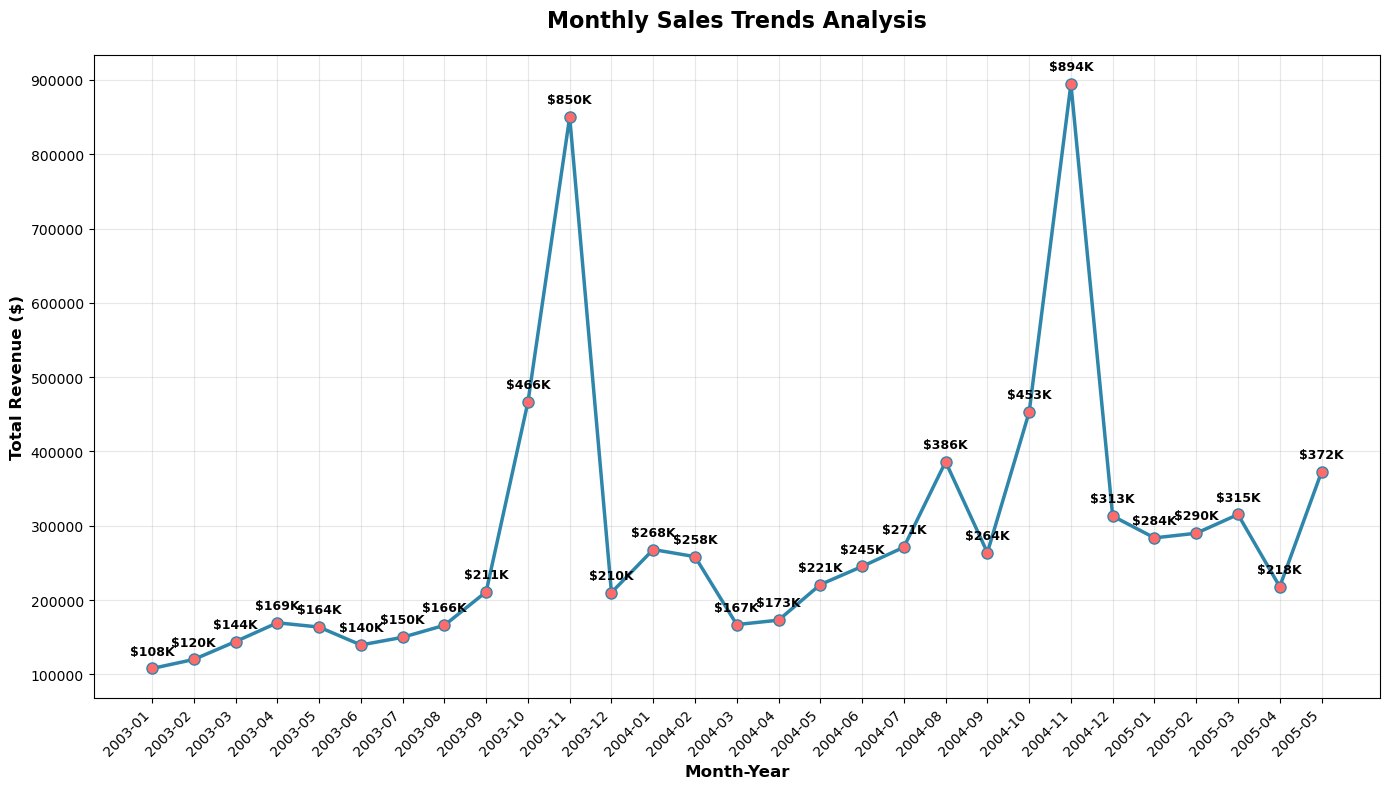

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['MONTH_YEAR_STR'], monthly_sales['TOTAL_REVENUE'], 
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB', markerfacecolor='#FF6B6B')

plt.title('Monthly Sales Trends Analysis', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
# Add value annotations
for i, (month, revenue) in enumerate(zip(monthly_sales['MONTH_YEAR_STR'], monthly_sales['TOTAL_REVENUE'])):
    plt.annotate(f'${revenue/1000:.0f}K', 
                (month, revenue),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                fontweight='bold')

plt.tight_layout()
plt.show()

## Task 2: Identify Best and Worst Months

### Identify best and worst performing months

In [18]:
best_month = monthly_sales.loc[monthly_sales['TOTAL_REVENUE'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['TOTAL_REVENUE'].idxmin()]

# Performance metrics
avg_monthly_revenue = monthly_sales['TOTAL_REVENUE'].mean()
best_performance = ((best_month['TOTAL_REVENUE'] - avg_monthly_revenue) / avg_monthly_revenue) * 100
worst_performance = ((worst_month['TOTAL_REVENUE'] - avg_monthly_revenue) / avg_monthly_revenue) * 100

print("BEST AND WORST PERFORMING MONTHS")
print("=" * 50)
print(f"   BEST MONTH: {best_month['MONTH_YEAR_STR']}")
print(f"   Total Revenue: ${best_month['TOTAL_REVENUE']:,.2f}")
print(f"   Orders: {best_month['ORDER_COUNT']}")
print(f"   Performance: +{best_performance:.1f}% above average")

print(f"\n WORST MONTH: {worst_month['MONTH_YEAR_STR']}")
print(f"   Total Revenue: ${worst_month['TOTAL_REVENUE']:,.2f}")
print(f"   Orders: {worst_month['ORDER_COUNT']}")
print(f"   Performance: {worst_performance:.1f}% below average")

print(f"\n AVERAGE MONTHLY: ${avg_monthly_revenue:,.2f}")

BEST AND WORST PERFORMING MONTHS
   BEST MONTH: 2004-11
   Total Revenue: $894,479.18
   Orders: 301
   Performance: +212.9% above average

 WORST MONTH: 2003-01
   Total Revenue: $107,885.96
   Orders: 39
   Performance: -62.3% below average

 AVERAGE MONTHLY: $285,892.65


### Visualize monthly performance comparison

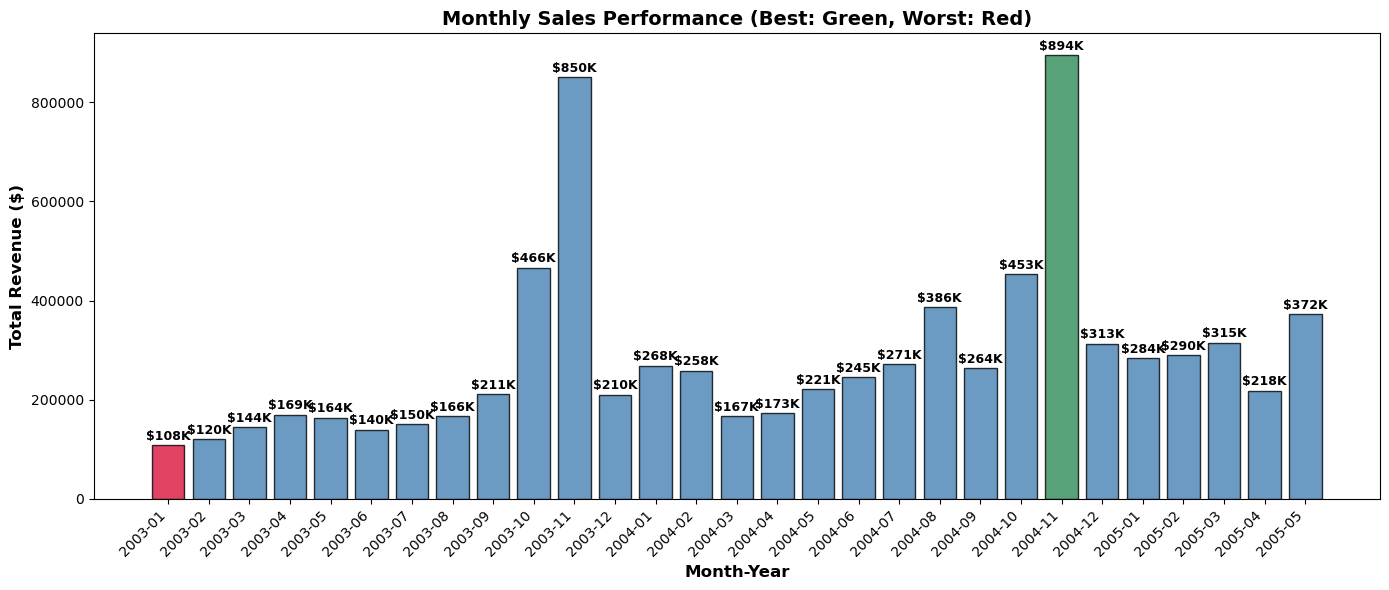

In [19]:
plt.figure(figsize=(14, 6))

# Create color coding for best/worst months
colors = []
for revenue in monthly_sales['TOTAL_REVENUE']:
    if revenue == best_month['TOTAL_REVENUE']:
        colors.append('#2E8B57')  # Green for best
    elif revenue == worst_month['TOTAL_REVENUE']:
        colors.append('#DC143C')  # Red for worst
    else:
        colors.append('#4682B4')  # Blue for others

bars = plt.bar(monthly_sales['MONTH_YEAR_STR'], monthly_sales['TOTAL_REVENUE'], 
               color=colors, alpha=0.8, edgecolor='black')

plt.title('Monthly Sales Performance (Best: Green, Worst: Red)', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar, revenue in zip(bars, monthly_sales['TOTAL_REVENUE']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f'${revenue/1000:.0f}K', ha='center', va='bottom', 
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Task 3: Regional Sales Analysis

### Analyze sales by region/country

In [21]:
regional_sales = sales_df.groupby('COUNTRY').agg({
    'REVENUE': ['sum', 'mean', 'count'],
    'QUANTITYORDERED': 'sum'
}).round(2)
regional_sales.columns = ['TOTAL_REVENUE', 'AVG_ORDER_VALUE', 'ORDER_COUNT', 'TOTAL_QUANTITY']
regional_sales = regional_sales.sort_values('TOTAL_REVENUE', ascending=False)
print("REGIONAL SALES PERFORMANCE")
print("=" * 45)
display(regional_sales.head(10))

REGIONAL SALES PERFORMANCE


,TOTAL_REVENUE,AVG_ORDER_VALUE,ORDER_COUNT,TOTAL_QUANTITY
COUNTRY,,,,
USA,2986425.21,2974.53,1004,35659
Spain,1021705.97,2987.44,342,12429
France,919257.85,2927.57,314,11090
Australia,521598.46,2819.45,185,6246
UK,413203.34,2869.47,144,5013
Italy,309402.87,2738.08,113,3773
Finland,268714.70,2920.81,92,3192
Norway,246115.80,2895.48,85,2842
Singapore,227985.50,2885.89,79,2760


### Create comprehensive regional analysis charts

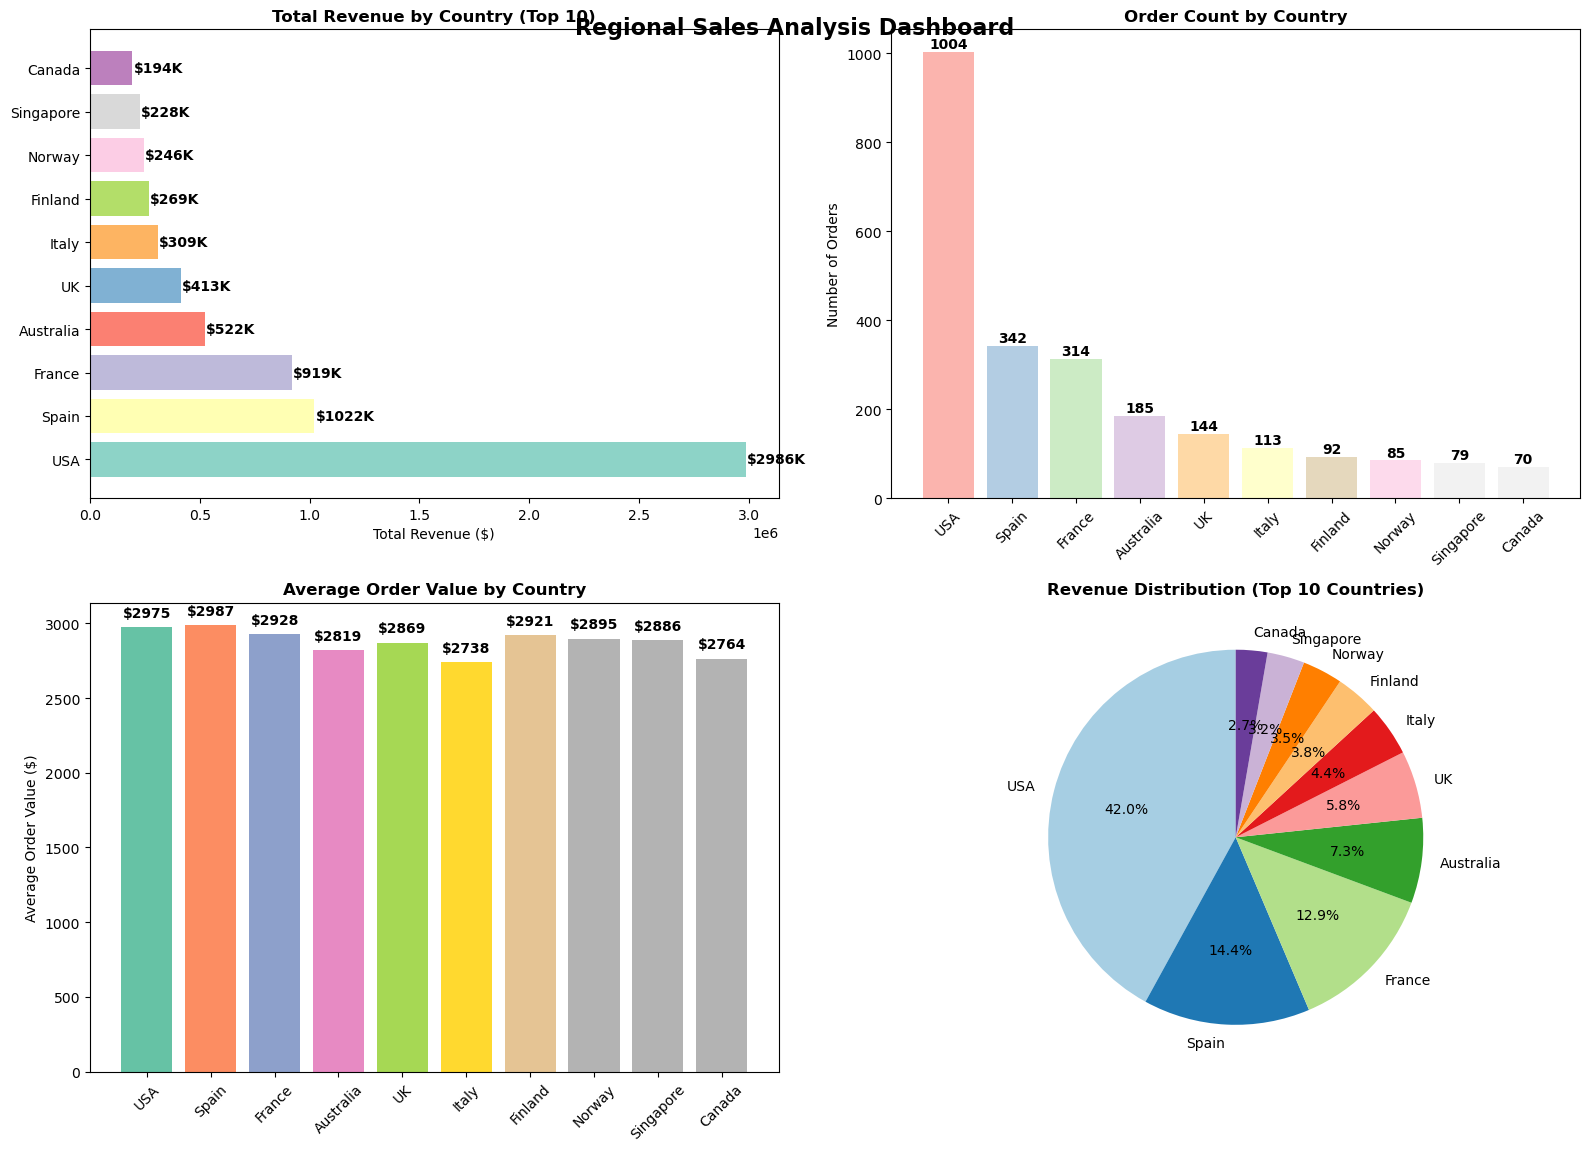

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regional Sales Analysis Dashboard', fontsize=16, fontweight='bold', y=0.95)

# Plot 1: Total Revenue by Country (Top 10)
top_countries = regional_sales.head(10)
bars1 = ax1.barh(top_countries.index, top_countries['TOTAL_REVENUE'], 
                 color=plt.cm.Set3(np.arange(len(top_countries))))
ax1.set_title('Total Revenue by Country (Top 10)', fontweight='bold')
ax1.set_xlabel('Total Revenue ($)')
for i, (country, revenue) in enumerate(zip(top_countries.index, top_countries['TOTAL_REVENUE'])):
    ax1.text(revenue + 5000, i, f'${revenue/1000:.0f}K', va='center', fontweight='bold')

# Plot 2: Order Count by Country
bars2 = ax2.bar(top_countries.index, top_countries['ORDER_COUNT'], 
                color=plt.cm.Pastel1(np.arange(len(top_countries))))
ax2.set_title('Order Count by Country', fontweight='bold')
ax2.set_ylabel('Number of Orders')
ax2.tick_params(axis='x', rotation=45)
for i, count in enumerate(top_countries['ORDER_COUNT']):
    ax2.text(i, count + 2, f'{count}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Average Order Value
bars3 = ax3.bar(top_countries.index, top_countries['AVG_ORDER_VALUE'], 
                color=plt.cm.Set2(np.arange(len(top_countries))))
ax3.set_title('Average Order Value by Country', fontweight='bold')
ax3.set_ylabel('Average Order Value ($)')
ax3.tick_params(axis='x', rotation=45)
for i, avg in enumerate(top_countries['AVG_ORDER_VALUE']):
    ax3.text(i, avg + 50, f'${avg:.0f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Revenue Distribution Pie Chart
ax4.pie(top_countries['TOTAL_REVENUE'], labels=top_countries.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired(np.arange(len(top_countries))))
ax4.set_title('Revenue Distribution (Top 10 Countries)', fontweight='bold')

plt.tight_layout()
plt.show()

### Product performance analysis

In [23]:
product_sales = sales_df.groupby('PRODUCTLINE').agg({
    'REVENUE': 'sum',
    'QUANTITYORDERED': 'sum',
    'ORDERNUMBER': 'count'
}).sort_values('REVENUE', ascending=False)

product_sales.columns = ['TOTAL_REVENUE', 'TOTAL_QUANTITY', 'ORDER_COUNT']

print("PRODUCT LINE PERFORMANCE")
print("=" * 40)
display(product_sales.round(2))

PRODUCT LINE PERFORMANCE


,TOTAL_REVENUE,TOTAL_QUANTITY,ORDER_COUNT
PRODUCTLINE,,,
Classic Cars,2968546.40,33992,967
Vintage Cars,1644212.05,21069,607
Motorcycles,971086.29,11663,331
Trucks and Buses,947355.18,10777,301
Planes,877942.21,10727,306
Ships,677940.40,8127,234
Trains,203804.26,2712,77


### Product line visualization

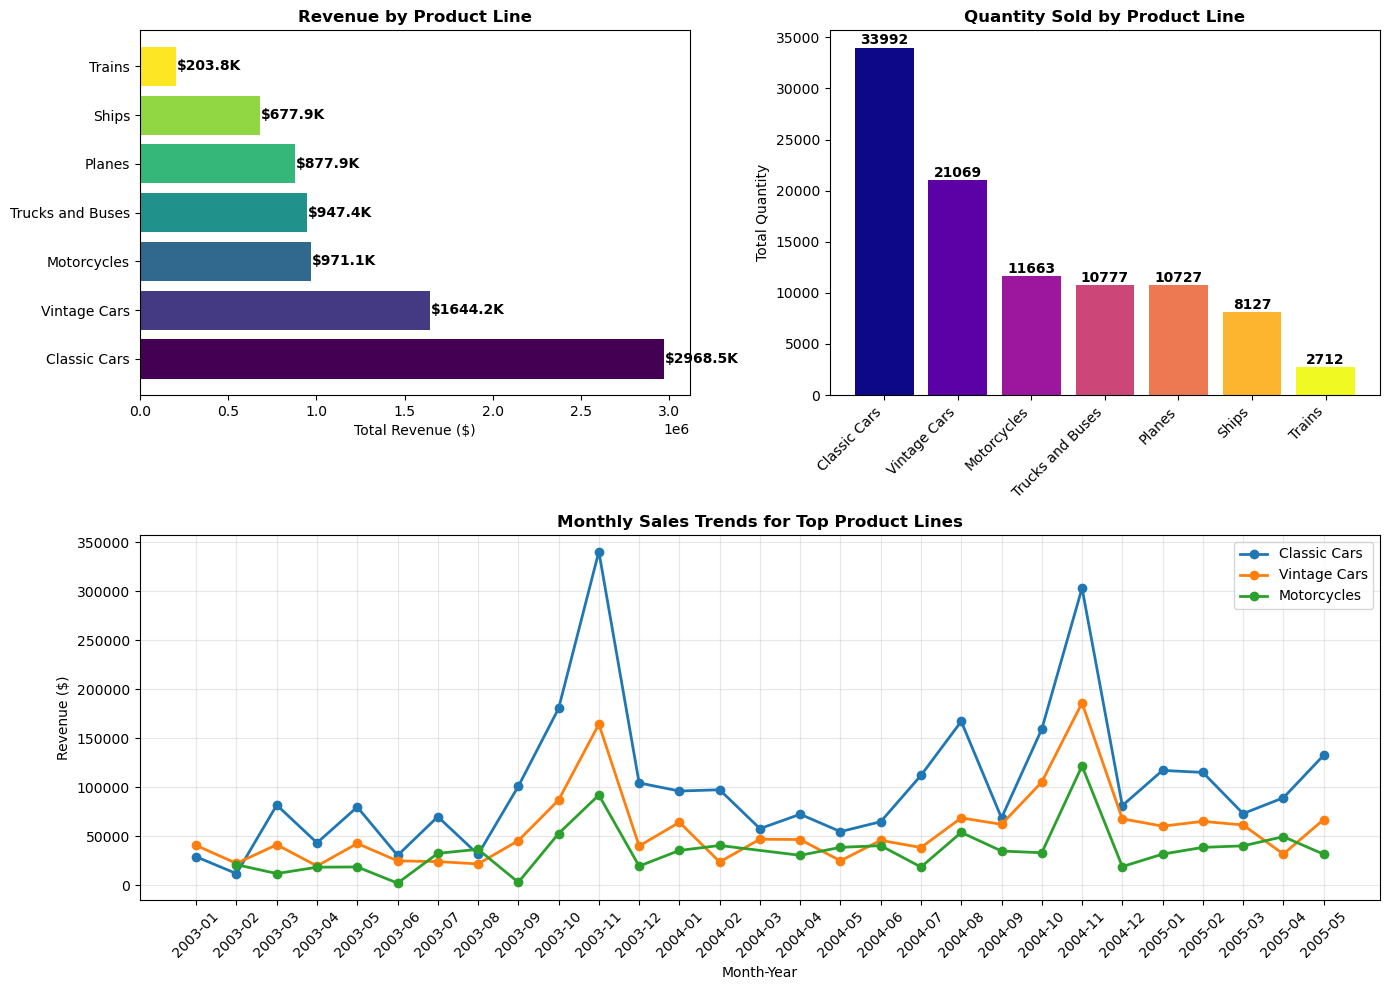

In [24]:
plt.figure(figsize=(14, 10))

# Plot 1: Revenue by Product Line
plt.subplot(2, 2, 1)
bars1 = plt.barh(product_sales.index, product_sales['TOTAL_REVENUE'], 
                 color=plt.cm.viridis(np.linspace(0, 1, len(product_sales))))
plt.title('Revenue by Product Line', fontweight='bold')
plt.xlabel('Total Revenue ($)')
for i, (product, revenue) in enumerate(zip(product_sales.index, product_sales['TOTAL_REVENUE'])):
    plt.text(revenue + 5000, i, f'${revenue/1000:.1f}K', va='center', fontweight='bold')

# Plot 2: Quantity Sold by Product Line
plt.subplot(2, 2, 2)
bars2 = plt.bar(product_sales.index, product_sales['TOTAL_QUANTITY'],
                color=plt.cm.plasma(np.linspace(0, 1, len(product_sales))))
plt.title('Quantity Sold by Product Line', fontweight='bold')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
for i, quantity in enumerate(product_sales['TOTAL_QUANTITY']):
    plt.text(i, quantity + 20, f'{quantity}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Monthly trends for top product lines
plt.subplot(2, 1, 2)
top_products = product_sales.head(3).index
for product in top_products:
    product_monthly = sales_df[sales_df['PRODUCTLINE'] == product].groupby('MONTH_YEAR')['REVENUE'].sum()
    plt.plot(product_monthly.index.astype(str), product_monthly.values, 
             marker='o', label=product, linewidth=2)

plt.title('Monthly Sales Trends for Top Product Lines', fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Revenue ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Seasonal analysis and growth trends

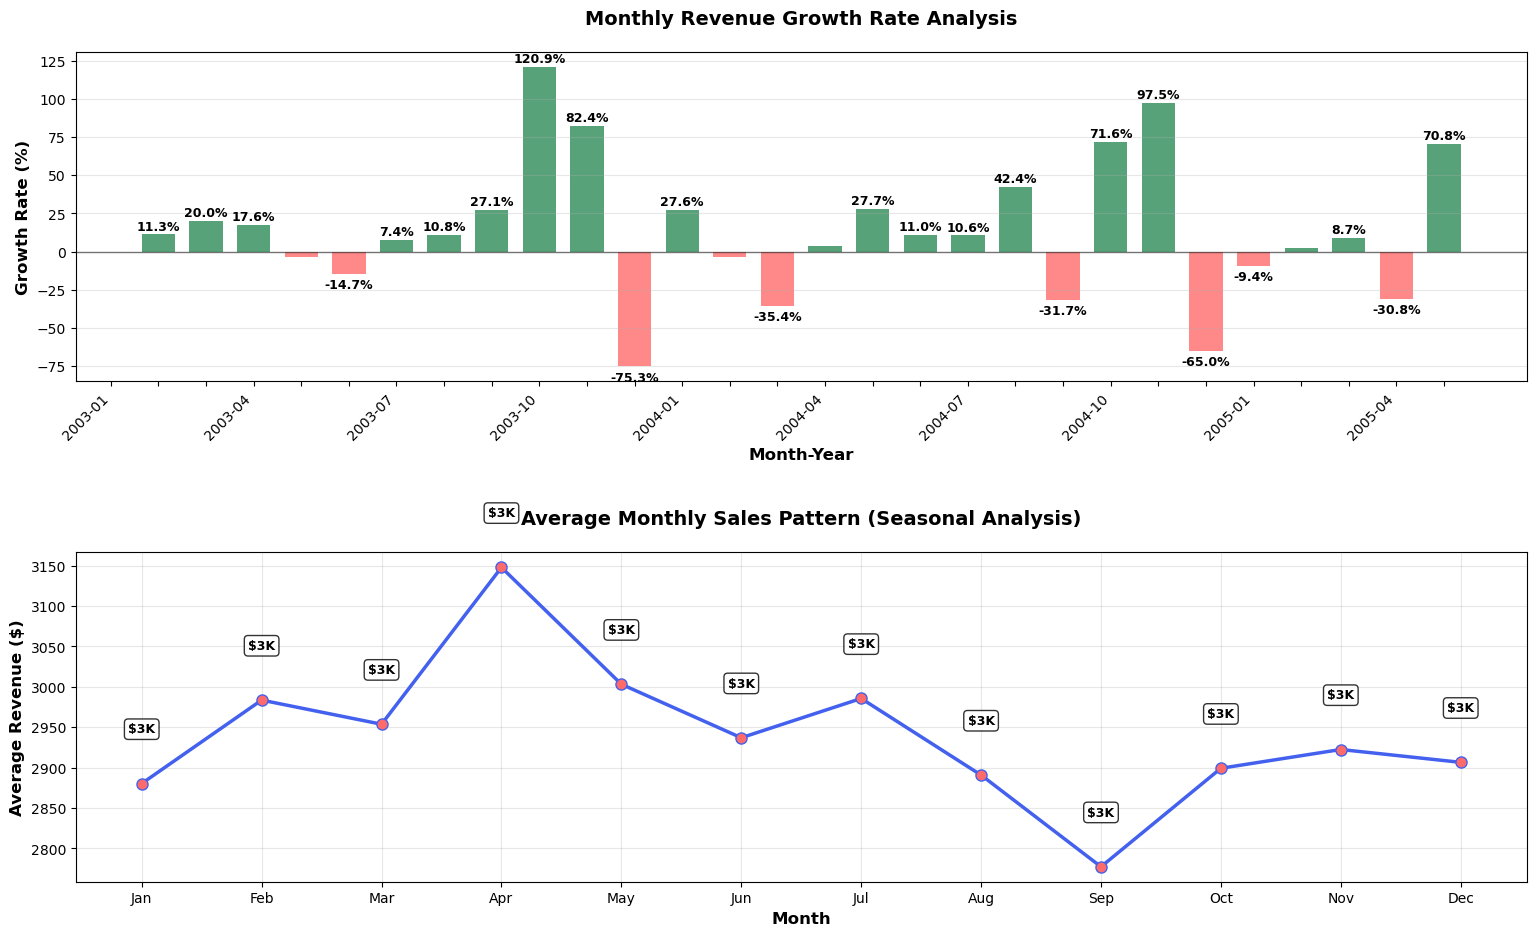

In [28]:
plt.style.use('default')  # Reset to clean style
plt.rcParams['font.family'] = 'DejaVu Sans'  # Clean font
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (16, 10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Monthly Growth Rate 
x_positions = range(len(monthly_sales))
x_labels = [str(month) if i % 3 == 0 else '' for i, month in enumerate(monthly_sales['MONTH_YEAR_STR'])]

growth_colors = ['#FF6B6B' if x < 0 else '#2E8B57' for x in monthly_sales['GROWTH_RATE']]
bars = ax1.bar(x_positions, monthly_sales['GROWTH_RATE'], color=growth_colors, alpha=0.8, width=0.7)

ax1.set_title('Monthly Revenue Growth Rate Analysis', fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Month-Year', fontsize=12, fontweight='bold')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(True, alpha=0.3, axis='y')

for i, (bar, rate) in enumerate(zip(bars, monthly_sales['GROWTH_RATE'])):
    if abs(rate) > 5:  # Only label significant changes
        ax1.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + (1 if rate >= 0 else -3), 
                f'{rate:.1f}%', 
                ha='center', 
                va='bottom' if rate >= 0 else 'top', 
                fontsize=9,
                fontweight='bold')

# Plot 2: Seasonal Pattern
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax2.plot(month_names, seasonal_avg.values, marker='o', linewidth=2.5, 
         color='#4361EE', markerfacecolor='#FF6B6B', markersize=8)
ax2.set_title('Average Monthly Sales Pattern (Seasonal Analysis)', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Average Revenue ($)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

for i, (month, avg) in enumerate(zip(month_names, seasonal_avg)):
    ax2.text(i, avg + seasonal_avg.max() * 0.02,  # Small offset from point
             f'${avg/1000:.0f}K', 
             ha='center', 
             fontsize=9,
             fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()

### Comprehensive summary report

In [29]:
print("COMPREHENSIVE SALES ANALYSIS REPORT")
print("=" * 60)

# Key metrics
total_revenue = sales_df['REVENUE'].sum()
total_orders = sales_df['ORDERNUMBER'].nunique()
avg_order_value = sales_df['REVENUE'].mean()
top_country = regional_sales.index[0]
top_product = product_sales.index[0]

print(f"   OVERALL BUSINESS PERFORMANCE")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Total Orders: {total_orders}")
print(f"   • Average Order Value: ${avg_order_value:,.2f}")
print(f"   • Analysis Period: {sales_df['ORDERDATE'].min().strftime('%Y-%m')} to {sales_df['ORDERDATE'].max().strftime('%Y-%m')}")

print(f"\n TOP PERFORMERS")
print(f"   • Best Month: {best_month['MONTH_YEAR_STR']} (${best_month['TOTAL_REVENUE']:,.2f})")
print(f"   • Top Country: {top_country} (${regional_sales.loc[top_country, 'TOTAL_REVENUE']:,.2f})")
print(f"   • Top Product Line: {top_product} (${product_sales.loc[top_product, 'TOTAL_REVENUE']:,.2f})")

print(f"\n GROWTH INSIGHTS")
print(f"   • Highest Growth Month: {monthly_sales.loc[monthly_sales['GROWTH_RATE'].idxmax(), 'MONTH_YEAR_STR']}")
print(f"   • Average Monthly Growth: {monthly_sales['GROWTH_RATE'].mean():.1f}%")

print(f"\n STRATEGIC RECOMMENDATIONS")
print(f"   1. Focus on replicating success factors from {best_month['MONTH_YEAR_STR']}")
print(f"   2. Allocate resources to top-performing {top_country} market")
print(f"   3. Invest in high-performing {top_product} product line")
print(f"   4. Address seasonal dips through targeted marketing")
print(f"   5. Expand successful strategies from best month to underperforming periods")

COMPREHENSIVE SALES ANALYSIS REPORT
   OVERALL BUSINESS PERFORMANCE
   • Total Revenue: $8,290,886.79
   • Total Orders: 307
   • Average Order Value: $2,936.91
   • Analysis Period: 2003-01 to 2005-05

 TOP PERFORMERS
   • Best Month: 2004-11 ($894,479.18)
   • Top Country: USA ($2,986,425.21)
   • Top Product Line: Classic Cars ($2,968,546.40)

 GROWTH INSIGHTS
   • Highest Growth Month: 2003-10
   • Average Monthly Growth: 14.4%

 STRATEGIC RECOMMENDATIONS
   1. Focus on replicating success factors from 2004-11
   2. Allocate resources to top-performing USA market
   3. Invest in high-performing Classic Cars product line
   4. Address seasonal dips through targeted marketing
   5. Expand successful strategies from best month to underperforming periods


### Export key insights to CSV

In [30]:
# Create summary dataframe for export
performance_summary = pd.DataFrame({
    'Metric': ['Total Revenue', 'Total Orders', 'Average Order Value', 
               'Best Month', 'Best Month Revenue', 'Top Country', 'Top Country Revenue'],
    'Value': [total_revenue, total_orders, avg_order_value,
             best_month['MONTH_YEAR_STR'], best_month['TOTAL_REVENUE'],
             top_country, regional_sales.loc[top_country, 'TOTAL_REVENUE']]
})

# Export to CSV
performance_summary.to_csv('sales_performance_insights.csv', index=False)
monthly_sales.to_csv('monthly_sales_trends.csv', index=False)
regional_sales.to_csv('regional_performance.csv', index=True)

print("Key insights exported to CSV files successfully!")
print("Files created:")
print("• sales_performance_insights.csv")
print("• monthly_sales_trends.csv")
print("• regional_performance.csv")

Key insights exported to CSV files successfully!
Files created:
• sales_performance_insights.csv
• monthly_sales_trends.csv
• regional_performance.csv
